In [1]:
import re
import json
import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('healthygames/hrating.json')

js = json.load(f)

In [3]:
nn_jj = []
nd = {}

for line in js:
    if 'title' in line:
        nd = {}
        nn_jj.append(nd)
        nd['title'] = line['title'][0].split("'")[1]
    elif 'reported' in line:
        try:
            nd[line['reported'][1]] = line['reported'][3]
        except:
            pass
    elif 'price' in line:
        nd['Price'] = line['price'][0].strip().split(':')[1].strip()
        nd['Ads'] = line['price'][1].strip().split(':')[1].strip()
        nd['In App Purchases'] = line['price'][2].strip().split(':')[1].strip()

In [4]:
with open('hrating_cleaned.json', 'w') as f:
    json.dump(nn_jj, f)

In [5]:
df = pd.read_json('hrating_cleaned.json')

In [6]:
df

,title,Temporal Dark Patterns,Monetary Dark Patterns,Social Dark Patterns,Psychological Dark Patterns,Price,Ads,In App Purchases
0,Hidden Folks,This game has 0 reported Temporal Dark Pattern...,This game has 0 reported Monetary Dark Pattern...,This game has 0 reported Social Dark Patterns....,This game has 0 reported Psychological Dark Pa...,$4.99,No,Yes
1,Sandwich Sudoku,This game has 0 reported Temporal Dark Pattern...,This game has 0 reported Monetary Dark Pattern...,This game has 0 reported Social Dark Patterns....,This game has 0 reported Psychological Dark Pa...,$4.99,No,No
2,"Peace, Death!",This game has 0 reported Temporal Dark Pattern...,This game has 0 reported Monetary Dark Pattern...,This game has 0 reported Social Dark Patterns....,This game has 0 reported Psychological Dark Pa...,$1.99,No,No
3,Vignettes,This game has 0 reported Temporal Dark Pattern...,This game has 0 reported Monetary Dark Pattern...,This game has 0 reported Social Dark Patterns....,This game has 0 reported Psychological Dark Pa...,$2.99,No,No
4,Root Board Game,This game has 0 reported Temporal Dark Pattern...,This game has 0 reported Monetary Dark Pattern...,This game has 0 reported Social Dark Patterns....,This game has 0 reported Psychological Dark Pa...,$9.99,No,No
...,...,...,...,...,...,...,...,...
26790,抢红包-全天24小时不间断红包雨！,NaN,NaN,NaN,NaN,$2.99,Yes,Unknown
26791,Slippy Evolution,NaN,NaN,NaN,NaN,$0.99,Unknown,Unknown
26792,"Fun Classic Board Games - Play MONOPOLY CLUE, ...",NaN,NaN,NaN,NaN,$10.99,Unknown,Yes
26793,THE GAME OF LIFE Value Pack - 15% off hours of...,NaN,NaN,NaN,NaN,$6.99,Unknown,Yes


In [7]:
dark_patterns_df = df[['Temporal Dark Patterns', 'Monetary Dark Patterns', 
                       'Social Dark Patterns', 'Psychological Dark Patterns']].dropna()

In [8]:
dark_patterns_df['Temporal Dark Patterns Present'] = dark_patterns_df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Monetary Dark Patterns Present'] = dark_patterns_df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Social Dark Patterns Present'] = dark_patterns_df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))
dark_patterns_df['Psychological Dark Patterns Present'] = dark_patterns_df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group()))

dark_patterns_df['Temporal Dark Patterns Absence'] = dark_patterns_df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Monetary Dark Patterns Absence'] = dark_patterns_df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Social Dark Patterns Absence'] = dark_patterns_df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))
dark_patterns_df['Psychological Dark Patterns Absence'] = dark_patterns_df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x.split('.')[1]).group()))

In [9]:
dark_patterns_df.drop(['Temporal Dark Patterns', 'Monetary Dark Patterns', 
                       'Social Dark Patterns', 'Psychological Dark Patterns'], axis=1)

,Temporal Dark Patterns Present,Monetary Dark Patterns Present,Social Dark Patterns Present,Psychological Dark Patterns Present,Temporal Dark Patterns Absence,Monetary Dark Patterns Absence,Social Dark Patterns Absence,Psychological Dark Patterns Absence
0,0,0,0,0,21,33,21,21
1,0,0,0,0,14,22,14,14
2,0,0,0,0,14,22,14,11
3,0,0,0,0,7,11,7,6
4,0,0,0,0,7,11,7,6
...,...,...,...,...,...,...,...,...
649,24,39,0,17,43,63,63,49
650,12,14,0,6,15,28,28,20
4019,0,2,1,0,0,0,0,0
18739,0,0,0,0,7,11,7,7


In [10]:
removed_rows = len(df) - len(dark_patterns_df)
print(f"Anzahl der entfernten Zeilen: {removed_rows}")

Anzahl der entfernten Zeilen: 26142


In [11]:
dark_patterns_df.to_csv('./h_dark_patterns.csv')

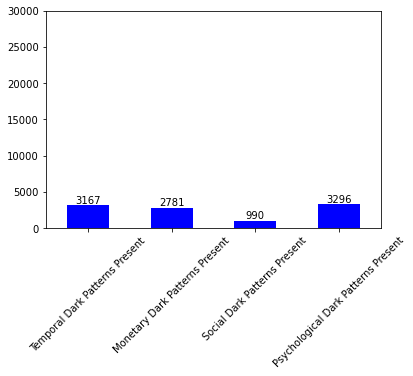

In [46]:
dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum().plot(kind='bar', rot=45, color='blue', ylim=(0,30000))
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height()}", ha='center', va='bottom')

plt.savefig('BarHealthyGamesPresent.pdf', format='pdf',bbox_inches='tight')


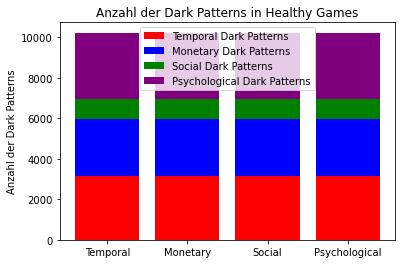

In [33]:
category_sums = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

fig, ax = plt.subplots()

patterns = ['Temporal', 'Monetary', 'Social', 'Psychological']
colors = ['red', 'blue', 'green', 'purple']
bottom = np.zeros(len(patterns))

pattern_values = []
for pattern in patterns:
    pattern_values.append(dark_patterns_df[f'{pattern} Dark Patterns Present'].sum())

for i, pattern in enumerate(patterns):
    ax.bar(patterns, pattern_values[i], bottom=bottom, color=colors[i], label=f'{pattern} Dark Patterns')
    bottom += pattern_values[i]

ax.set_ylabel('Anzahl der Dark Patterns')
ax.set_title('Anzahl der Dark Patterns in Healthy Games')
ax.legend()

plt.show()

<AxesSubplot:ylabel='Density'>

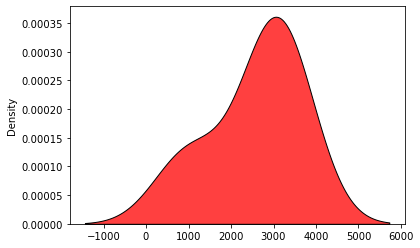

In [19]:
sum_df = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 
                           'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

sns.kdeplot(sum_df, multiple='stack', color='r')

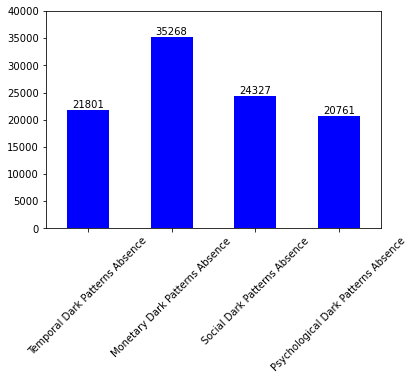

In [45]:
dark_patterns_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum().plot(kind='bar', rot=45,color='blue', ylim=(0,40000))
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height()}", ha='center', va='bottom')

plt.savefig('BarHealthyGamesAbsence.pdf', format='pdf',bbox_inches='tight')

<AxesSubplot:ylabel='Density'>

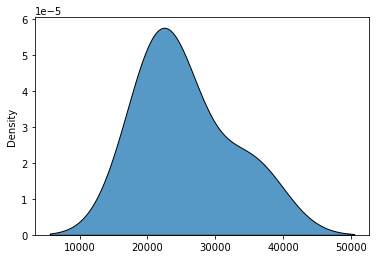

In [22]:
sum_df = dark_patterns_df[['Temporal Dark Patterns Absence', 'Monetary Dark Patterns Absence', 'Social Dark Patterns Absence', 'Psychological Dark Patterns Absence']].sum()

sns.kdeplot(sum_df, multiple='stack')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

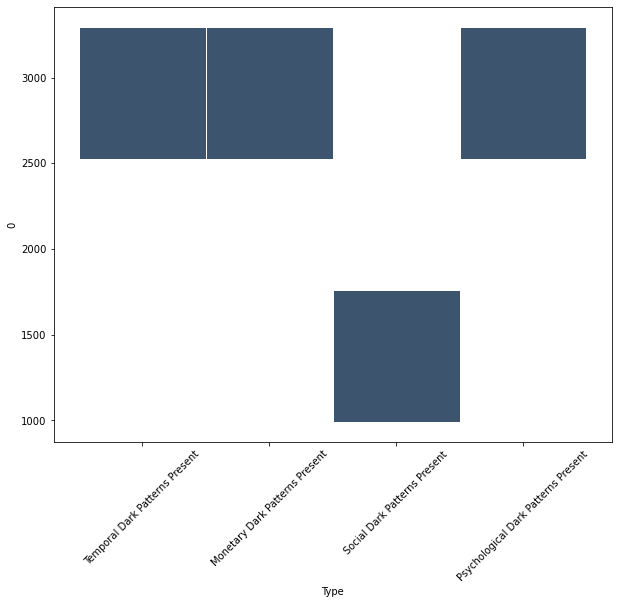

In [23]:
summed = dark_patterns_df[['Temporal Dark Patterns Present', 'Monetary Dark Patterns Present', 'Social Dark Patterns Present', 'Psychological Dark Patterns Present']].sum()

data = pd.DataFrame(summed).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(x='index', y=0, data=data, ax=ax, edgecolor='white')
plt.xlabel('Type')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='None-index'>

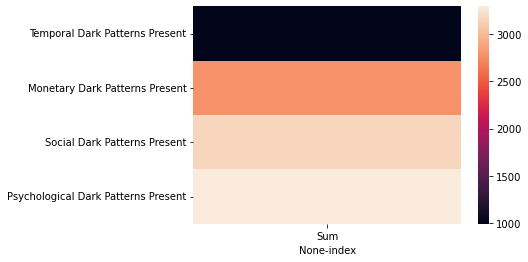

In [24]:
sns.heatmap(data.pivot(0, 'index').reset_index(), yticklabels=data['index'], xticklabels=['Sum'])

In [25]:
df = df.dropna()

df[(df['Temporal Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1) 
   & (df['Monetary Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)
      & (df['Social Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)
          & (df['Psychological Dark Patterns'].apply(lambda x: int(re.search(r'\d+', x).group())) > 1)]

,title,Temporal Dark Patterns,Monetary Dark Patterns,Social Dark Patterns,Psychological Dark Patterns,Price,Ads,In App Purchases
511,Among Us!,This game has 5 reported Temporal Dark Pattern...,This game has 5 reported Monetary Dark Pattern...,This game has 12 reported Social Dark Patterns...,This game has 7 reported Psychological Dark Pa...,Free,Yes,Yes
524,inbento,This game has 7 reported Temporal Dark Pattern...,This game has 11 reported Monetary Dark Patter...,This game has 7 reported Social Dark Patterns....,This game has 7 reported Psychological Dark Pa...,$1.49,No,No
545,Roblox,This game has 37 reported Temporal Dark Patter...,This game has 263 reported Monetary Dark Patte...,This game has 119 reported Social Dark Pattern...,This game has 132 reported Psychological Dark ...,Free,Yes,Yes
547,Super Mario Run,This game has 206 reported Temporal Dark Patte...,This game has 6 reported Monetary Dark Pattern...,This game has 92 reported Social Dark Patterns...,This game has 217 reported Psychological Dark ...,Free,No,Yes
548,I Love Hue,This game has 19 reported Temporal Dark Patter...,This game has 11 reported Monetary Dark Patter...,This game has 6 reported Social Dark Patterns....,This game has 16 reported Psychological Dark P...,Free,Unknown,Yes
564,Plague Inc.,This game has 98 reported Temporal Dark Patter...,This game has 123 reported Monetary Dark Patte...,This game has 104 reported Social Dark Pattern...,This game has 198 reported Psychological Dark ...,$0.99,Yes,Yes
572,My Singing Monsters DawnOfFire,This game has 4 reported Temporal Dark Pattern...,This game has 4 reported Monetary Dark Pattern...,This game has 2 reported Social Dark Patterns....,This game has 3 reported Psychological Dark Pa...,Free,Yes,Yes
581,Crossy Road,This game has 11 reported Temporal Dark Patter...,This game has 3 reported Monetary Dark Pattern...,This game has 3 reported Social Dark Patterns....,This game has 12 reported Psychological Dark P...,Free,Yes,Yes
582,Minecraft,This game has 161 reported Temporal Dark Patte...,This game has 197 reported Monetary Dark Patte...,This game has 40 reported Social Dark Patterns...,This game has 200 reported Psychological Dark ...,$6.99,No,Yes
587,Bloons TD 6,This game has 18 reported Temporal Dark Patter...,This game has 44 reported Monetary Dark Patter...,This game has 20 reported Social Dark Patterns...,This game has 37 reported Psychological Dark P...,$6.99,No,Yes


In [26]:
df['Price'] = df['Price'].apply(lambda x: 'Not Free' if (x != 'Free') else 'Free')

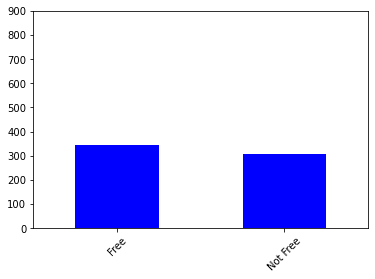

In [44]:
pd.value_counts(df["Price"]).plot.bar(rot=45, color='blue', ylim=(0,900))

plt.savefig('BarHealthyPrice.pdf', format='pdf',bbox_inches='tight')

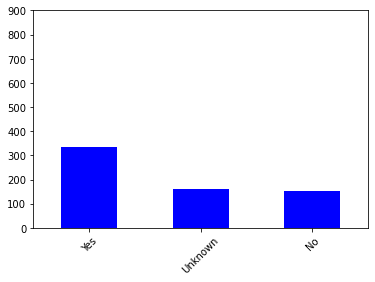

In [42]:
df['In App Purchases'] = df['In App Purchases'].fillna('Unknown')
pd.value_counts(df["In App Purchases"]).plot.bar(rot=45, color='blue', ylim=(0,900))

plt.savefig('BarHealthyGamesinAppPurchases.pdf', format='pdf',bbox_inches='tight')

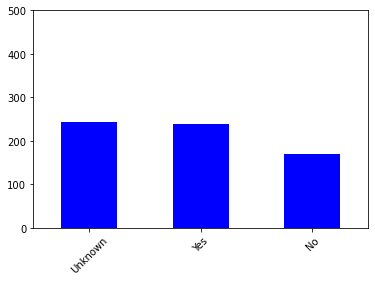

In [43]:
df['Ads'] = df['Ads'].fillna('Unknown')
pd.value_counts(df["Ads"]).plot.bar(rot=45, color='blue', ylim=(0,500))

plt.savefig('BarHealthyGamesAds.pdf', format='pdf',bbox_inches='tight')

In [32]:
df.shape

(652, 8)